<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data

**Install the libraries**


In [71]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
!pip install matplotlib



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.


### Step 1: Download the dataset


In [73]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Step 2: Import necessary libraries and load the dataset


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [75]:
df = pd.read_csv("cleaned_survey_data_V2.csv")

### Display the first few rows of the data to understand its structure


In [76]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Other,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10,0-5
1,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10,5-10
2,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,Other,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10,5-10
3,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other,Technical documentation;Blogs;Written Tutorial...,Other,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7,10-20
4,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Other,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5,>20


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.


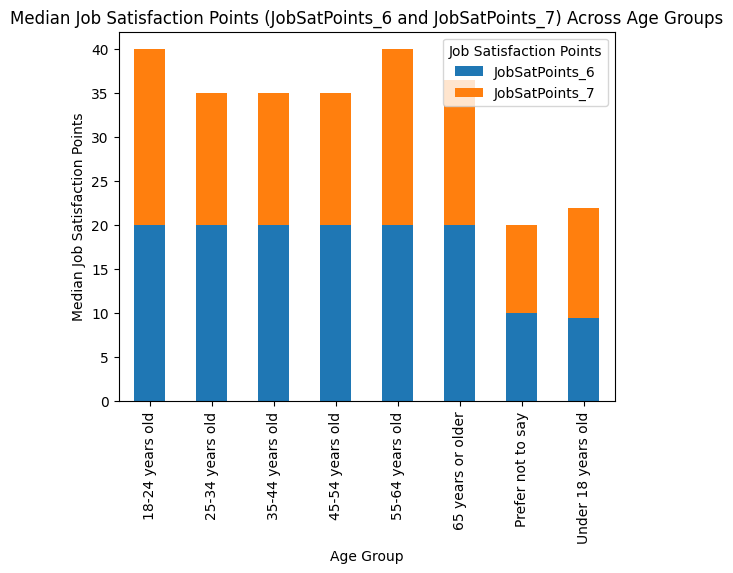

In [77]:

# Map age groups to numerical values
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

# Convert Age column to numerical values
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Calculate median job satisfaction scores for each age group
median_job_sat = df.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Plot the stacked bar chart
plt.figsize=(18, 6) 
median_job_sat.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.title("Median Job Satisfaction Points (JobSatPoints_6 and JobSatPoints_7) Across Age Groups")
plt.legend(title="Job Satisfaction Points", loc="best")
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


<Figure size 1800x1000 with 0 Axes>

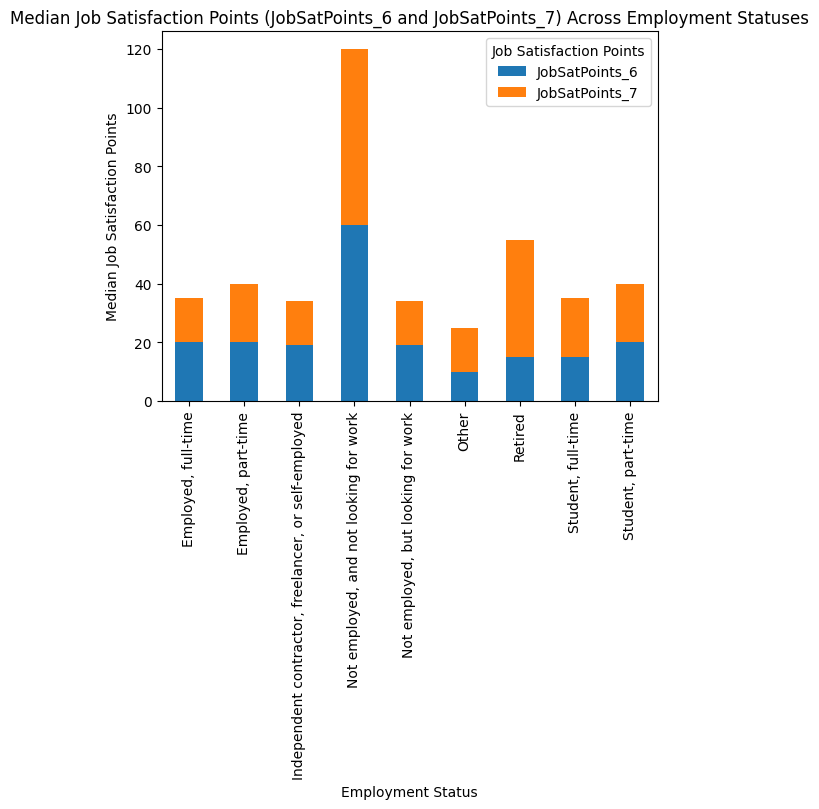

In [97]:
# Split the Employment column by ',' and ';' and explode it
df_exploded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()

# Remove duplicates
df_exploded = df_exploded.drop_duplicates(subset=['ResponseId', 'Employment'])

# Calculate median job satisfaction scores for each employment status
median_job_sat_employment = df_exploded.groupby("Employment")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Plot the stacked bar chart
plt.figure(figsize=(18,10))
median_job_sat_employment.plot(kind="bar", stacked=True)
plt.xlabel("Employment Status")
plt.ylabel("Median Job Satisfaction Points")
plt.title("Median Job Satisfaction Points (JobSatPoints_6 and JobSatPoints_7) Across Employment Statuses")
plt.legend(title="Job Satisfaction Points", loc="best")
plt.show()




### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


<Figure size 1800x600 with 0 Axes>

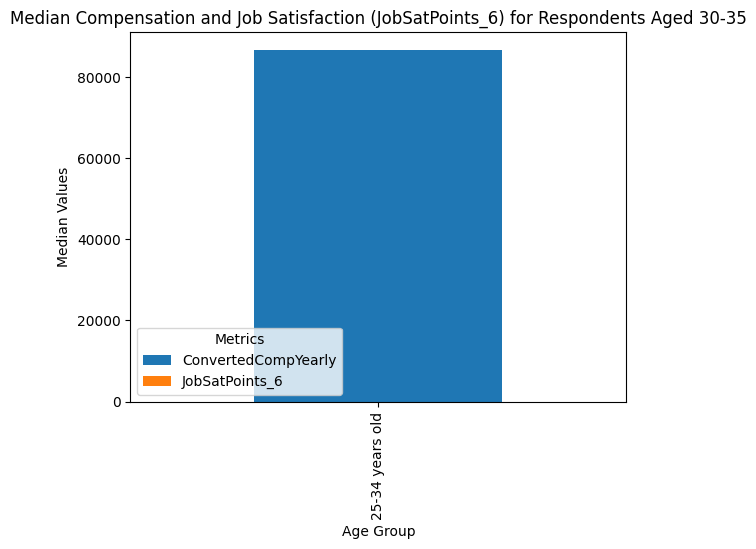

In [79]:
##Write your code here
# Filter the dataframe for respondents aged 30-35
df_30_35 = df[df["AgeNumeric"].between(30, 35)]

# Calculate median compensation and job satisfaction for each age group
median_comp_job_sat = df_30_35.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()

# Plot the stacked bar chart
plt.figure(figsize=(18, 6))
median_comp_job_sat.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Median Values")
plt.title("Median Compensation and Job Satisfaction (JobSatPoints_6) for Respondents Aged 30-35")
plt.legend(title="Metrics", loc="best")
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


<Figure size 1800x600 with 0 Axes>

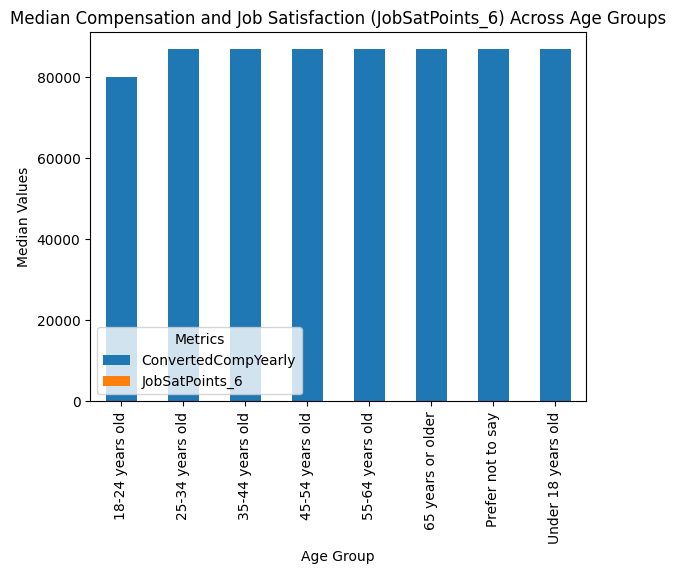

In [80]:
##Write your code here
# Calculate median compensation and job satisfaction for each age group
median_comp_job_sat_age = df.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()

# Plot the stacked bar chart
plt.figure(figsize=(18, 6))
median_comp_job_sat_age.plot(kind="bar", stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Median Values")
plt.title("Median Compensation and Job Satisfaction (JobSatPoints_6) Across Age Groups")
plt.legend(title="Metrics", loc="best")
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group


Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


<Figure size 2000x1000 with 0 Axes>

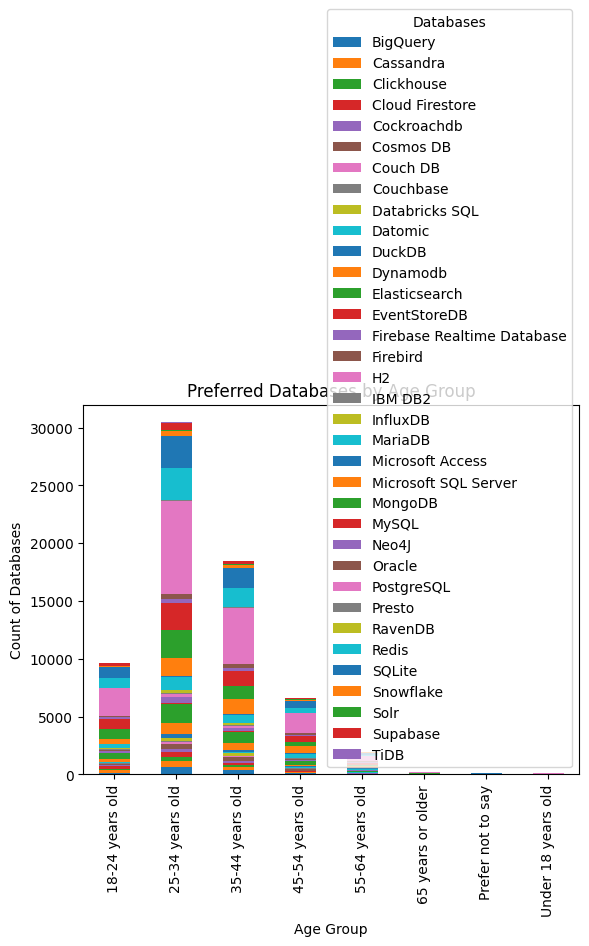

In [91]:
##Write your code here
# Split the DatabaseWantToWorkWith column by ';' and explode it
df_exploded_db = df.assign(DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseWantToWorkWith')

# Remove duplicates
df_exploded_db = df_exploded_db.drop_duplicates(subset=['ResponseId', 'DatabaseWantToWorkWith'])
df_exploded_db['DatabaseWantToWorkWith'] = df_exploded_db['DatabaseWantToWorkWith'].str.strip()

# Count the occurrences of each database for each age group
db_counts = df_exploded_db.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack().fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(20, 10))
db_counts.plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count of Databases")
plt.title("Preferred Databases by Age Group")
plt.legend(title="Databases", loc="best")
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Figure size 1800x1000 with 0 Axes>

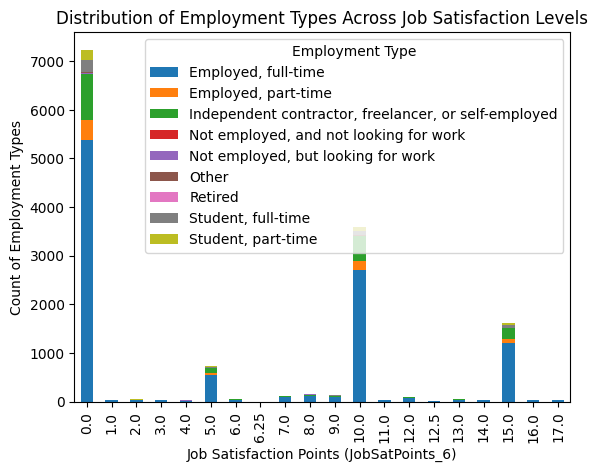

In [96]:
##Write your code here
df_exploded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Calculate the count of each employment type within each job satisfaction level
employment_job_sat_counts = df_exploded.groupby(['JobSatPoints_6', 'Employment']).size().unstack().fillna(0).head(20)

# Plot the stacked bar chart
plt.figure(figsize=(18, 10))
employment_job_sat_counts.plot(kind='bar', stacked=True)
plt.xlabel("Job Satisfaction Points (JobSatPoints_6)")
plt.ylabel("Count of Employment Types")
plt.title("Distribution of Employment Types Across Job Satisfaction Levels")
plt.legend(title="Employment Type", loc="best")
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 2000x1000 with 0 Axes>

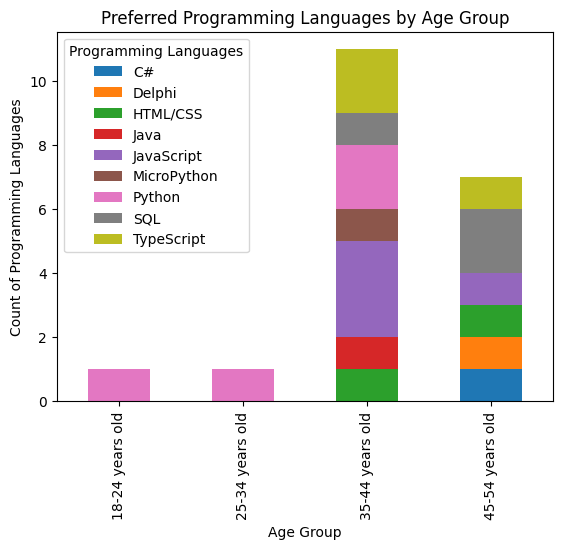

In [107]:
##Write your code here
# Split the LanguageAdmired column by ';' and explode it
df_exploded_lang = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired').head(20)

# Remove duplicates
df_exploded_lang = df_exploded_lang.drop_duplicates(subset=['ResponseId', 'LanguageAdmired'])
df_exploded_lang['LanguageAdmired'] = df_exploded_lang['LanguageAdmired'].str.strip()

# Count the occurrences of each language for each age group
lang_counts = df_exploded_lang.groupby(['Age', 'LanguageAdmired']).size().unstack().fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(20, 10))
lang_counts.plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count of Programming Languages")
plt.title("Preferred Programming Languages by Age Group")
plt.legend(title="Programming Languages", loc="best")
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


<Figure size 2000x1000 with 0 Axes>

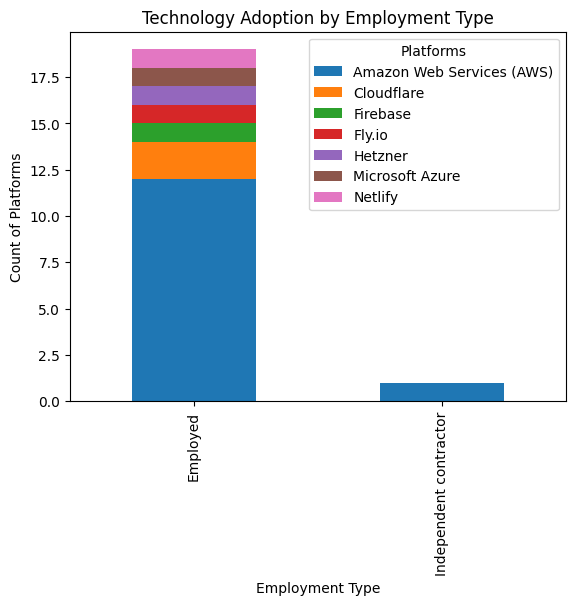

In [118]:
# Split the Employment column by ',' and ';' and explode it
df_exploded_platform = df.assign(Employment=df['Employment'].str.split(r'[;,]')).explode('Employment')
df_exploded_platform['Employment'] = df_exploded_platform['Employment'].str.strip()

# Remove duplicates
df_exploded_platform = df_exploded_platform.drop_duplicates(subset=['ResponseId', 'Employment'])

# Split the PlatformAdmired column by ';' and explode it
df_exploded_platform = df_exploded_platform.assign(PlatformAdmired=df['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')
df_exploded_platform['PlatformAdmired'] = df_exploded_platform['PlatformAdmired'].str.strip()

# Remove duplicates
df_exploded_platform = df_exploded_platform.drop_duplicates(subset=['ResponseId', 'PlatformAdmired']).head(20)

# Count the occurrences of each platform for each employment type
platform_counts = df_exploded_platform.groupby(['Employment', 'PlatformAdmired']).size().unstack().fillna(0)

# Plot the stacked bar chart
plt.figure(figsize=(20, 10))
platform_counts.plot(kind='bar', stacked=True)
plt.xlabel("Employment Type")
plt.ylabel("Count of Platforms")
plt.title("Technology Adoption by Employment Type")
plt.legend(title="Platforms", loc="best")
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
